# Task 5

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from utils.linear_approximator import linapx
from utils.radial_basis_approximator import rbapx
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from math import pi
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Part 1

In [2]:
data = np.loadtxt("data/MI_timesteps.txt", skiprows=1)

In [4]:
dataPID = data[:, 2:5]

In [5]:
def get_window(data, start=0, delay=350):
    N = data.shape[0]
    if start+delay < N:
        return data[start:(start+delay+1)]

In [10]:
X = get_window(dataPID).reshape(1,-1)
N = dataPID.shape[0]
start = 1
delay = 350
while start + delay < N:
    newrow = get_window(dataPID, start, delay).reshape(1,-1)
    X = np.vstack((X, newrow))
    start += 1
    if start%2000 == 0:
        print(start)
    
X.shape

2000
4000
6000
8000
10000
12000
14000


(14651, 1053)

In [19]:
X_normalizor =  Normalizer().fit(X)

In [21]:
X_norm = X_normalizor.transform(X)

#### 3 PCs are needed according to Takens

In [23]:
pca = PCA(n_components=3)
proj_X = pca.fit_transform(X_norm)

In [26]:
energy = pca.explained_variance_ratio_
cum_energy = np.cumsum(energy)

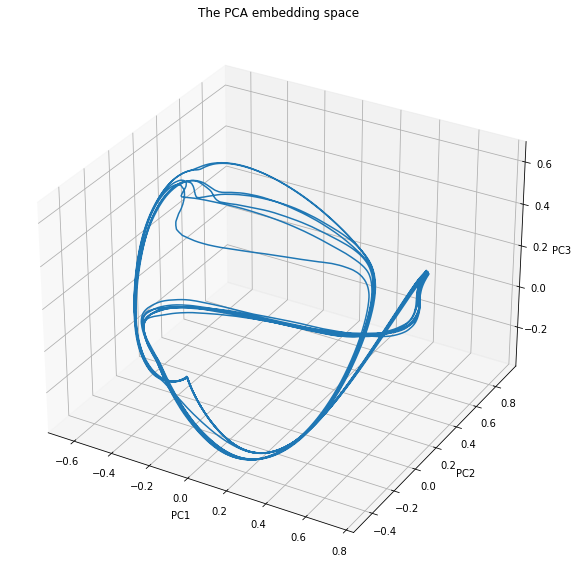

In [39]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(proj_X[:, 0], proj_X[:,1], proj_X[:, 2])
#ax.view_init(40, 0)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.title.set_text("The PCA embedding space")
plt.show()

In [49]:
c_idx = np.arange(14651)

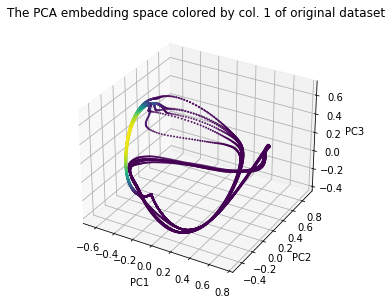

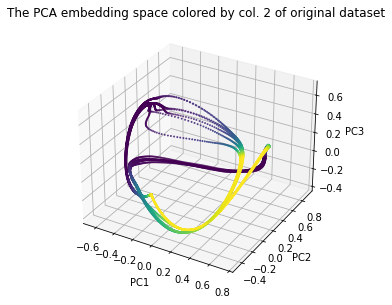

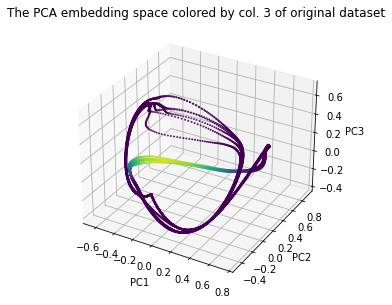

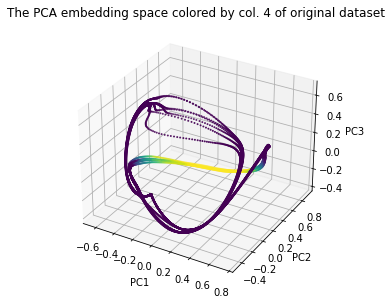

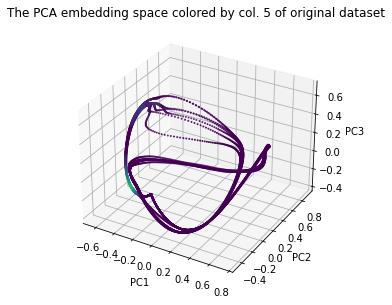

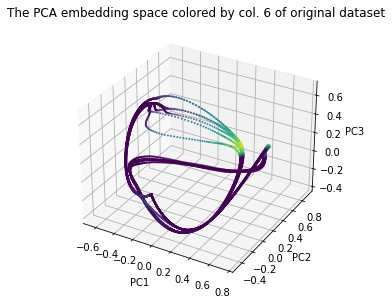

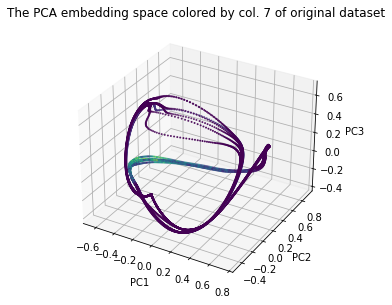

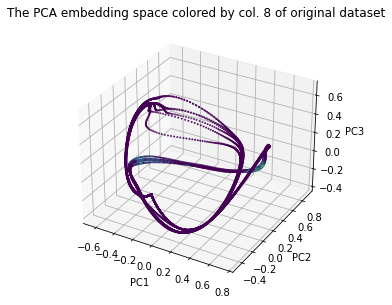

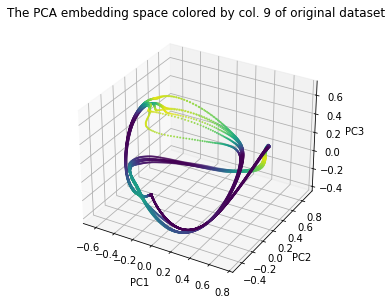

In [67]:
for k in range(9):
    fig = plt.figure(constrained_layout=True)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(proj_X[:, 0], proj_X[:,1], proj_X[:, 2], c=data[c_idx, k+1], s=1)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.title.set_text("The PCA embedding space colored by col. %d of original dataset"%(k+1))

#### Find the period first

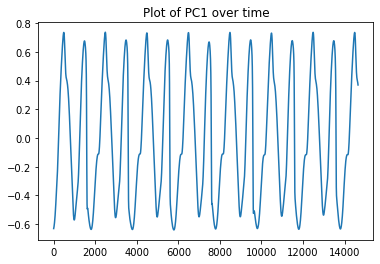

In [82]:
plt.plot(proj_X[:,0])
plt.title("Plot of PC1 over time")
plt.show()

#### The period is about 2000

In [92]:
print("The period is", np.argmin(proj_X[3500:4000,0]) + 3500 -np.argmin(proj_X[1500:2000,0]) - 1500)

The period is 1986


#### Compute velocity

In [95]:
t1 = np.argmin(proj_X[3500:4000,0]) + 3500
t0 = np.argmin(proj_X[1500:2000,0]) + 1500
T = t1-t0

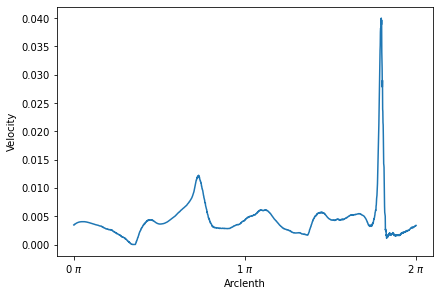

In [112]:
v = []
arclen = []
dt = 1
for t in range(t0, t1+1):
    arclen.append((t-t0)/T)
    dx = proj_X[t+1] - proj_X[t]
    v.append(np.linalg.norm(dx)/dt)

    
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot()
ax.plot(2*np.array(arclen), v)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1.0))
ax.set_ylabel("Velocity")
ax.set_xlabel("Arclenth")
plt.show()